# Работа с библиотекой SymPy

### Инициализация

Наиболее удобным способом работы с библиотекой SymPy является использование `jupyter-notebook`. Начинать работу следует с инициализации, которая часто будет сводиться к выполнению следующих двух команд:

In [1]:
from sympy import *
init_printing()

Первая из этих команд подключает библиотеку SymPy.

Если закомментировать вторую команду, добавив перед ней  символ `#`, то математические формулы не будут выглядеть естественно (обязательно попробуйте это сделать). 

### Числа языка Python и числа в SymPy

С целыми числами можно работать и без использования библиотеки SymPy:

In [2]:
2**200

Если результат выполнения команды имеет слишком большую длину, то он может оказаться неудобным для восприятия:

In [3]:
2**1000

В зависимости от используемых настроек визуализации математики может либо появлятся горизонтальная полоса 
прокрутки, либо выводимый текст будет становиться очень мелким.
Эти настройки можно менять с помощью клика правой кнопки мыши на поле вывода математики 
(меню `Math settings | Math Renderer`). По умолчанию мы используем `SVG`, который позволяет получить наиболее
качественную визуализцию математических формул.

Для получения более удобного для восприятия вывода результата можно использовать функцию `print`:

In [4]:
print(2**1000)

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376


Важно понимать, что **числа языка Python и числа в SymPy являются объектами разных типов**. Для получения из обычных чисел, строк и иных объектов «символьных сущностей» удобнее всего использовать функцию `S`. Разницу между «обычными» числами и «числами библиотеки SymPy» показывают следующие примеры.

In [5]:
type(1)

int

In [6]:
type(S(1))

sympy.core.numbers.One

In [7]:
type(S(1.2))

sympy.core.numbers.Float

Вычисления с простыми дробями в SymPy выполняются точно:

In [8]:
 S(1)/3+S(4)/3

Функция `N` и метод `evalf` позволяют получить численное значение выражения, при этом второй аргумент функции `N` и (единственный) аргумент метода `evalf` определяют количество *значащих цифр* в результате. Функция `N` сама преобразует свой первый аргумент к одному из типов библиотеки SymPy, а метод `evalf` может быть применён только к «числам библиотеки SymPy»:

In [9]:
N(5/3, 5)

In [10]:
(S(5)/S(3)).evalf(50)

«Обычные» действительные числа хранятся в компьютере с ограниченной точностью и поэтому попытка вывода большого количества цифр такого числа приводит к получению «мусора»:

In [11]:
N(5/3, 50)

Деление «числа библиотеки SymPy» даже на обычное целое число в качестве результата порождает «число библиотеки SymPy», у которого можно получить сколь угодно много точных цифр после запятой:

In [12]:
N(S(5)/3, 50)

### Математические константы

In [13]:
pi

In [14]:
pi.evalf()

In [15]:
N(pi,100)

In [16]:
E

In [17]:
N(E,100)

In [18]:
sqrt(pi)

In [19]:
sqrt(pi).evalf()

In [20]:
I

In [21]:
I**2

In [22]:
E**(I*pi)

### Переменные и выражения

Для работы с символьными переменными необходимо объявлять их. Мы будем делать это с помощью метода `var`:

In [23]:
var('a b c d')

После этого можно конструировать любые символьные выражения:

In [24]:
 e = (a + b)**2/(c-3)

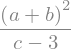

In [25]:
e

Подстановка в выражение определённых значений переменных выполняется с помощью метода `subs`:

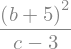

In [26]:
e.subs(a,5)

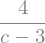

In [27]:
e.subs({a: 5, b: -3})

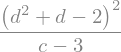

In [28]:
e.subs({a: d-2, b: d*d})

SymPy позволяет удобно работать с многочленами:

In [29]:
var('t')
q = t**3-3*t**2+4*t-7

In [30]:
q

In [31]:
q**2

Раскрыть скобки позволяет функция `expand`:

In [32]:
expand(q**2)

Факторизация — разложение на множители — выполняется функцией `factor`:

In [33]:
factor(t**3-1)

Вот примеры работы с некоторыми элементарными функциями: 

In [34]:
 sin(1)

In [35]:
N(sin(1),20)

In [36]:
sin(pi/2)

In [37]:
 sin(t)**2 + cos(t)**2

In [38]:
simplify(sin(t)**2 + cos(t)**2)

In [39]:
log(2)

In [40]:
log(E**3)

### Решение уравнений

Для символьного решения уравнений следует использовать функцию `solveset`, возвращающую множество корней уравнения.

In [41]:
solveset(t**2 - 7*t + 12, t)

In [42]:
solveset(t - t, t, domain = S.Reals)

In [43]:
solveset(t - t + 1, t, domain = S.Reals)

In [44]:
solveset(t*t + 1, t)

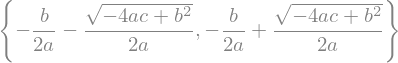

In [45]:
solveset(a*t**2 + b*t + c, t)

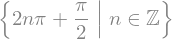

In [46]:
solveset(sin(t) - 1, t, domain = S.Reals)

In [47]:
var('w')
w = log(t - 1) / log(3)
solveset(w**2 - 4*w + 3, t)

Функция `nroots` позволяет получить приближённые значения корней *многочлена* с заданным числом значащих цифр:

In [48]:
nroots(t*t - 2, 10)

С помощью функции `linsolve` можно решать системы линейных уравнений:

In [49]:
var('u v')
linsolve([u - 2*v, 3*u + v - 7], u, v)

### Построение графиков функций

Библиотека `SymPy` позволяет строить графики функций, заданных явными формулами, неявными соотношениями или параметрически. В этом заключается её основное преимущество перед иными способами построения графиков в Python-средах, которые требуют обязательного вычисления координат точек, образующих искомый график.

При построении графиков функций SymPy испольует библиотеку matplotlib. При этом по умолчанию все графики будут «встраиваться» в блокнот.

На локальном компьютере, где установлено необходимое программное обеспечение, может
оказаться полезным изображать графики в отдельном окне, так как у этого варианта имеются определённые достоинства. Для этого необходимо воспользоваться командой `%matplotlib`. **Это не работает на «Подспорье» — необходим запуск Jupyter Notebook на локальном компьютере!**

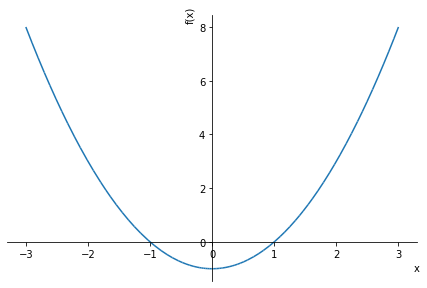

In [50]:
var('x')
plot(x*x - 1, (x, -3, 3))

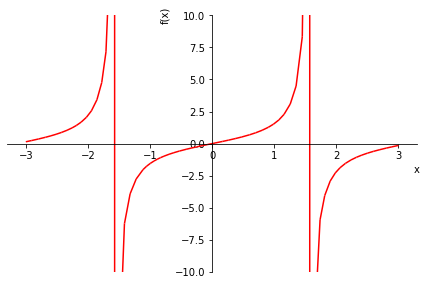

In [51]:
p = plot(sin(x)/cos(x), (x,-3,3), ylim = (-10,10), line_color = 'r')

Обратите внимание на тот факт, что мы указали лишь желаемые границы изменения переменных `x` и `y`, а наиболее подходящий масштаб по осям был выбран автоматически.

В следующем примере на одной системе координат рисуется сразу несколько графиков, изображаемых различными цветами.

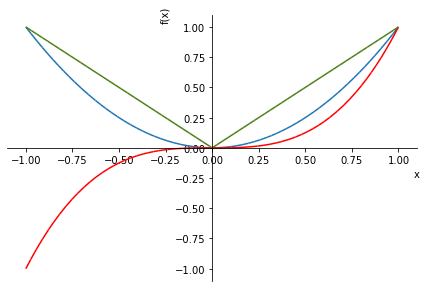

In [52]:
p1 = plot(x**2, (x,-1,1), show = False)
p1.line_color = 'cyan'
p2 = plot(x**3, (x,-1,1), show=False, line_color = 'r')
p3 = plot(Abs(x), (x,-1,1), show=False, line_color = (0.3,0.5,0.1))
p1.extend(p2)
p1.extend(p3)
p1.show()

Часто разумно предоставлять SymPy (а точнее, matplotlib) возможность самостоятельно определять отношение масштабов по осям координат. Иногда, как в случае с графиком функции $y=|x|$, желательно использовать одинаковые масштабы, ибо в противном случае график выглядит «непривычно». Параметр `aspect_ratio` позволяет добиться желаемого:

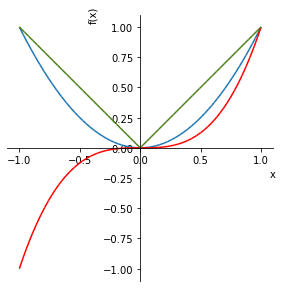

In [53]:
p1 = plot(x**2, (x,-1,1), show = False, aspect_ratio = (1,1))
p1.line_color = 'cyan'
p2 = plot(x**3, (x,-1,1), show=False, line_color = 'r', aspect_ratio = (1,1))
p3 = plot(Abs(x), (x,-1,1), show=False, line_color = (0.3,0.5,0.1), aspect_ratio = (1,1))
p1.extend(p2)
p1.extend(p3)
p1.show()

А вот так можно построить график функции, заданной неявно. Здесь просто необходимо использовать одинаковый масштаб по осям, так как иначе вместо окружности мы получаем эллипс.

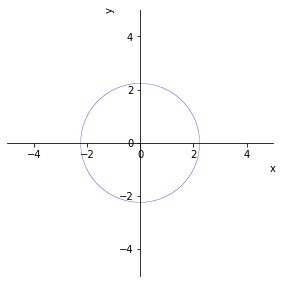

In [54]:
var('y')
plot_implicit(x**2 + y**2 - 5, aspect_ratio = (1,1))

Подобным образом можно строить графики функций, заданных параметрически. В нижеприведённом примере можно не изменять масштаб, используемый по умолчанию.

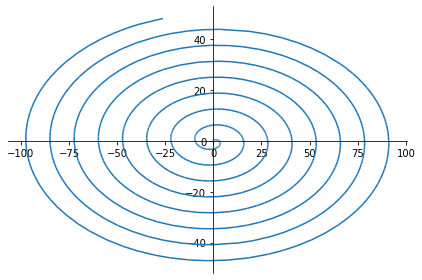

In [55]:
plotting.plot_parametric(2*t*sin(t), t*cos(t), (t, 0, 50))

Для построения графиков в полярных координатах следует воспользоваться равенствами $x = r \cos(\varphi)$, $y = r \sin(\varphi)$ и функцией `plot_parametric`:

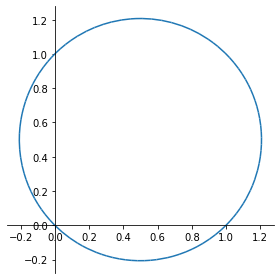

In [56]:
var('phi')
r = sin(phi) + cos(phi)
plotting.plot_parametric((r*cos(phi), r*sin(phi)), (phi, 0, pi), aspect_ratio = (1,1))

Библиотека SymPy позволяет строить также и графики функций двух переменных — поверхности в трёхмерном пространстве:

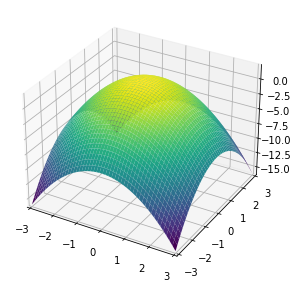

In [57]:
plotting.plot3d(2 - x**2 - y**2, (x,-3,3), (y, -3, 3))